<h1>Содержание<span class="tocSkip"></span></h1>

1. Изучим данные из файла
2. Предобработка данных
3. Проведем исследовательский анализ данных
4. Составим портрет пользователя каждого региона
5. Проверим гипотезы
6. Общий вывод


## Изучим данные из файла

Составим первое представление о данных.

Импортируем библиотеки pandas, matplotlib,numpy, seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import ceil
pd.set_option('display.max_columns', None)

Прочитаем файл `games.csv`  из папки `datasets` и сохраним в переменную: `df`

In [2]:
df = pd.read_csv('/datasets/games.csv')

Выведем на экран первые 10 строк.

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Чтобы посмотреть на общую информацию 'df' воспользуемся методом info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведим название столбцов.

In [5]:
df.columns.to_list()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Название столбцов:

- Name - название игры;
- Platform - платформа;
- Year_of_Release - год выпуска;
- Genre - жанр игры;
- NA_sales - продажи в Северной Америке;
- EU_sales - продажи в Европе;
- JP_sales - продажи в Японии;
- Other_sales - продажи в других странах;
- Critic_Score - оценкак критиков;
- User_Score - оценка польователей;
- Rating - рейтинг от организации ESRB

Разделим на категориальные и количественные столбцы.

Категориальные столбцы:

- Name
- Platform
- Year_of_Release
- Genre
- Rating

Количественные столбцы:

- NA_sales
- EU_sales
- JP_sales
- Other_seles
- Criric_seles
- Critic_Score
- User_Score


Проверим наш датасет на наличие дубликатов.

In [6]:
df.duplicated().sum()

0

## Вывод

Приведем данные к нужному типу. В таблице названия столбцов и колонок приведем к нижнему регистру. В столбце user_score привести значение столбца в числовой формат. В столбцах name, year_of_release, genre, critic_score, user_score, rating имеются пропуски . Дубликатов нет.

### Предобработка данных

Приведем названия столбцов и колонок к нижнему регистру.

In [7]:
df[['Name','Platform', 'Genre', 'Rating']] = df[['Name','Platform', 'Genre', 'Rating']].apply(lambda x : x.str.lower())
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df.columns = df.columns.str.lower()

Добвим столбец с годом выпуска для построения графиков

In [9]:
df['yr'] = pd.to_datetime(df['year_of_release'], format='%Y')

В столбце user_score посмотрим какие оценки пользователей у нас есть.

In [10]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1         2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце platform посмотрим какие платформы для игр есть.

In [11]:
df['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       29
ng        12
ws         6
scd        6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

## Вывод

Привели названия столбцов и колонок к нижнему регистру.
В столбце user_score увидели аббревиатуру tbd, разберем это значение и опишем, как его обработать.

## Обработка пропусков

Найдем столбцы с пропусками.

In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
yr                  269
dtype: int64

Рассмотрим столбец name.


In [13]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yr
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1993-01-01
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1993-01-01


Рассмотрим столбец genre

In [14]:
df[df['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yr
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1993-01-01
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1993-01-01


Так как долю аномальных значений в столбцах 'name', 'genre' составляет меньше 1%, то избавимся от пропусков 

In [15]:
df.dropna(subset = ['name', 'genre'], inplace = True)

Рассмотрим столбец critic_score.

In [16]:
df[df['critic_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yr
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1989-01-01
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1984-01-01
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016-01-01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006-01-01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016-01-01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003-01-01


Доля пропущенных значений в столбец critic_score составляет более 5%, оставим пропуски. Замена на среднее, медиану или 0 может исказить результаты исследовательского анализа данных.

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значения NAN, 0. Оставим пропуски, замена может исказить результаты анализа данных. Также видим аббревиатуру tbd - "будет определено". Используется tbd, если какое-то  решение по вопросу не принято. Данные были не заполнены специально, так как не определились с рейтингом.  Заменить tbd на NaN.

In [18]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df['user_score'] = df['user_score'].astype(float)

Рассмотрим столбец rating

In [19]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Пропуски в столбце rating могут говорить о том, что игра не получила рейтинг от организации ESRB. Или возможно, это случайный пропуск. Заменять и удалять пропуски не будем.

## Вывод

Так как долю аномальных значений в столбцах 'name', 'genre' составляет меньше 1%, то избавились от пропусков.
Доля пропущенных значений в столбец "critic_score" составлила более 5%, оставили пропуски. 
В столбце "user_score" значения NAN, 0 оставили, удалим их перед проверкой гипотез.  Выяснили, что аббревиатуру "tbd" значает "to be determined", "to be done". Данные были не заполнены специально, так как не определились с рейтингом.  Заменили tbd на NaN для проведения дальнейшего анализа.
Пропуски в столбце "rating" могет говорить о том, что игра не получила рейтинг от организации ESRB. Или возможно, это случайный пропуск. Заменять и удалять пропуски не стали.

## Посчитаем суммарные продажи во всех регионах.



Создадим новый столбец total_sales и посчитаем продажи во всех регионах.

In [20]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yr,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,2006-01-01,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,2008-01-01,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,2009-01-01,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38


## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы?

Сформирует сводную таблицу методом pivot_table. Построим график, который показывает изменение количества игр выпускаемых в разные годы.

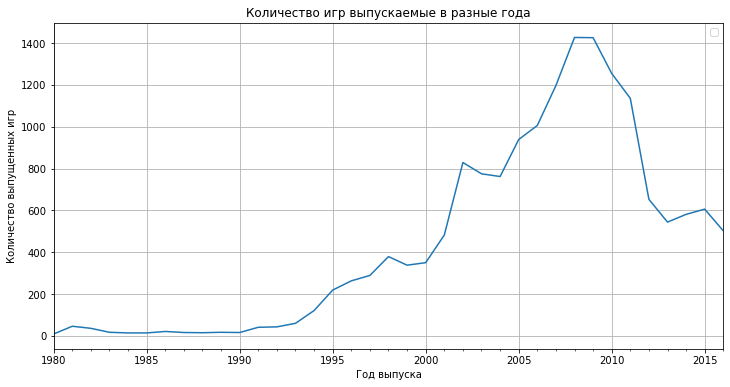

In [21]:
games_year = df.pivot_table(index='yr', values='name', aggfunc='count')
games_year.plot(figsize=(12,6), grid=True)
plt.axvline(x = 3, color = 'red', linestyle = ':')
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

### Вывод
Видим, что количество выпускаемых игр растет начиная с 1998 года до 2008 года.
После 2009 года видим резкий спад игр. Вероятно спад выпускаемых игр связан с мобильными приложениями игр.

### Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
В переменной forecast_year укажем прогнозируемый год.

In [22]:
forecast_year = 2017

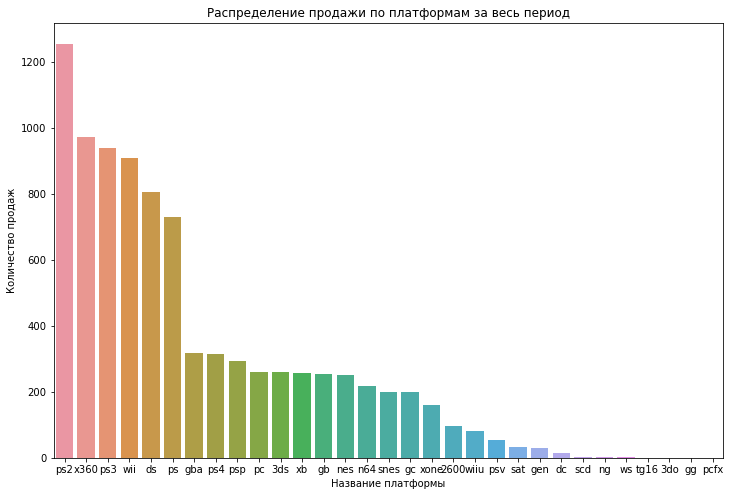

In [23]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=platform_sales.index, y=platform_sales['total_sales'])
plt.title('Распределение продажи по платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()

## Вывод

Самые популярные платформы за весь период это ps2, x360, ps3, wii.

Возьмем данные за соответсвующий актуальный период и сохраним в таблицу df_live. Актуальный период рассчитаем по среднему числу лет продажи платформы. Посмотрим какие платформы были активны за этот период.

In [24]:
min_sales = 5
platform_sales_mean = df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('total_sales > @min_sales')

platform_life = ceil(platform_sales_mean.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean())
platform_life


7

Рассчитанный средний период жизни платформы 7 лет, но это большой срок для динамично развивающийся игровой индустрии. Новые версии консолей выходят чаще. Улучшаются игровые движки, сокрощается срок разработки игр. Сократим период анализа до 5 лет.

In [25]:
platform_life = 5

Отберем данные за актуальный период

In [26]:
df_live = df[(df['year_of_release'] >= (forecast_year - platform_life)) & (df['year_of_release'] < forecast_year)]

In [27]:
df_live.groupby('platform').count().sort_values(by='total_sales', ascending=False).reset_index()

,platform,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yr,total_sales
0,ps3,493,493,493,493,493,493,493,214,283,300,493,493
1,psv,411,411,411,411,411,411,411,107,130,138,411,411
2,3ds,396,396,396,396,396,396,396,104,114,142,396,396
3,ps4,392,392,392,392,392,392,392,252,257,255,392,392
4,x360,292,292,292,292,292,292,292,171,235,244,292,292
5,pc,250,250,250,250,250,250,250,198,206,185,250,250
6,xone,247,247,247,247,247,247,247,169,182,186,247,247
7,psp,173,173,173,173,173,173,173,1,4,7,173,173
8,wiiu,147,147,147,147,147,147,147,90,100,105,147,147
9,wii,54,54,54,54,54,54,54,5,17,34,54,54


Рассчитали актуальный период это - 5 лет. Посмотрели какие платформы были активны за этот период. 

### Посмотрим какие платформы лидируют по продажам, растут или падают за актуальный период.

In [28]:
df_platform_year = df_live.pivot_table(index='year_of_release', columns=['platform'], values='total_sales', aggfunc='sum')
df_platform_year

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


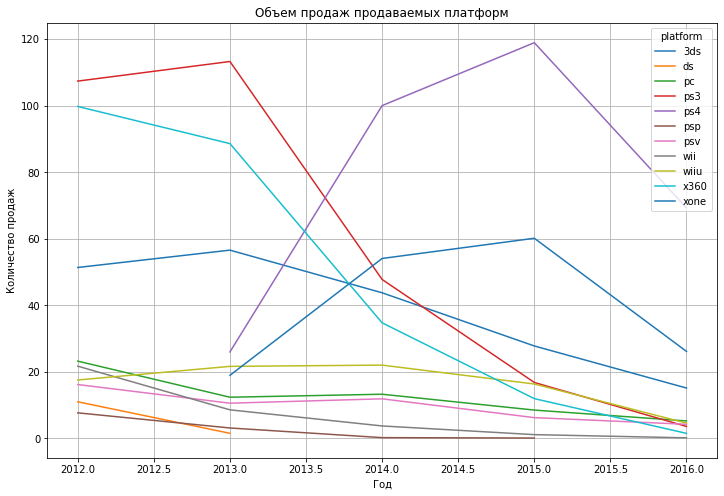

In [29]:
df_platform_year.plot(figsize=(12,8), kind='line', grid=True)

plt.title('Объем продаж продаваемых платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

### Вывод

Почти все игровые платформы в среднем живут 5 лет.
За период с 2012 самые активные платформы были РS3, X360, 3DS.
Продажи платформы 3DS c 2013 года и к концу 2016 года постепенно падают.
Продажи платформа РS3 к концу 2016 года падают, так как в 2013 году появилась новая версия платформы PS4.  Пик продаж платформы PS4 приходится на 2015 год.
Продажи игровой платформы X360 к концу 2016 года падают, так как в 2013 году появилась новая верия платформы XONE. Пик продаж платформы XONE приходится на 2015.
Потенциально прибыльные платформы XONE и PS3.



### Построим график по глобальным продажам игр в разбивке по платформам.

Найдем топ-5 платформ по объему продаж и в переменной globals_sales сохраним топ 5 платформ

In [30]:
top_5_platform = (df_live.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values(by='total_sales', ascending=False).head(5))
top_5_platform

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32


In [31]:
list_of_top5 = ['ps4','ps3','x360','3ds', 'xone']
globals_sales = df_live[df_live['platform'].isin(['ps4','ps3','x360','3ds', 'xone'])]
globals_sales['total_sales'].describe()

count    1820.000000
mean        0.655714
std         1.477562
min         0.010000
25%         0.060000
50%         0.190000
75%         0.630000
max        21.050000
Name: total_sales, dtype: float64

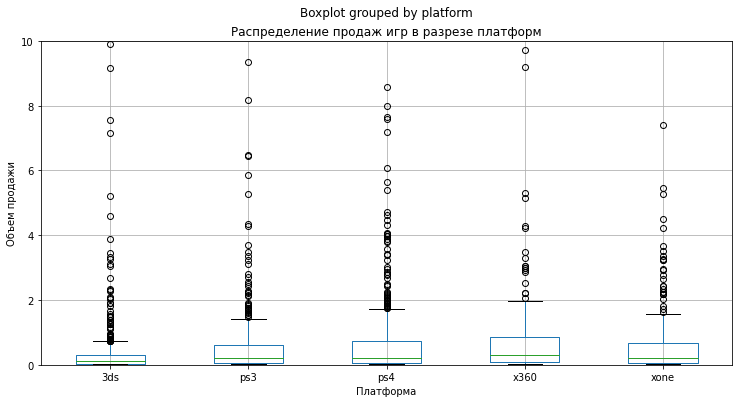

In [32]:
globals_sales.boxplot(column='total_sales', by='platform', figsize=(12,6))
plt.ylim(0,10)
plt.xlabel('Платформа')
plt.ylabel('Объем продажи')
plt.title('Распределение продаж игр в разрезе платформ')
plt.show()

### Вывод

Нашли топ-5 игровых платформ по объему продаж. 
На графике "ящик с усами" видно, что медианы у всех протекают по разному.
Больше всего продаж у платформы X360, затем PS4, PS3 и в конце платфоома 3DS. 
Вероятно в 2017 году будут выпускать игру на платформе PS3 потому, что она еще активна и продажи от нее хороши.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Посчитаем корреляции и построим диаграммы рассеяния между отзывами пользователей и критиков и продажами платформ.

Напишем  цикл для каждой популярой платформы

Коэффициенты корреляции
   Mежду отзывами пользователей и продажами "PS4" равен -0.031957110204556424
   Между отзывами критиков и продажами "PS4" равен 0.40656790206178095
   Mежду отзывами пользователей и продажами "PS3" равен -0.005143522887113815
   Между отзывами критиков и продажами "PS3" равен 0.3314972592629587
   Mежду отзывами пользователей и продажами "X360" равен 0.006163978646213326
   Между отзывами критиков и продажами "X360" равен 0.3605734888507336
   Mежду отзывами пользователей и продажами "3DS" равен 0.19758263411038599
   Между отзывами критиков и продажами "3DS" равен 0.3208028695360785
   Mежду отзывами пользователей и продажами "XONE" равен -0.06892505328279414
   Между отзывами критиков и продажами "XONE" равен 0.4169983280084017




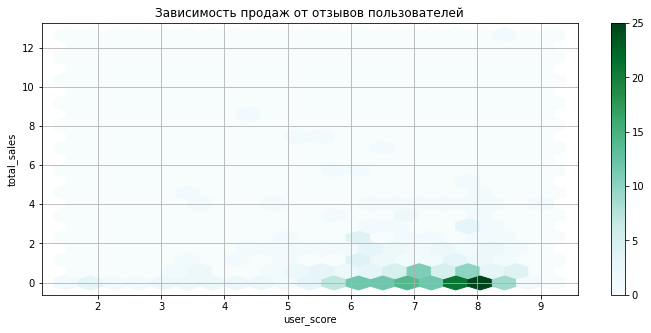

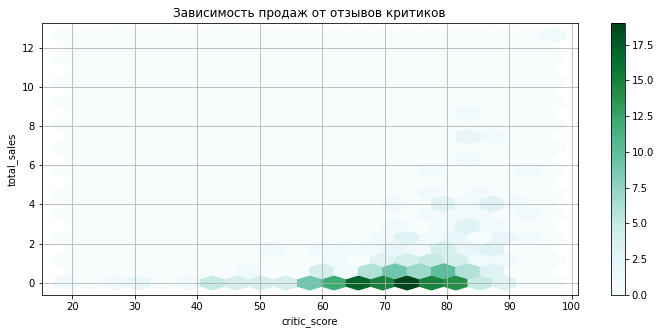

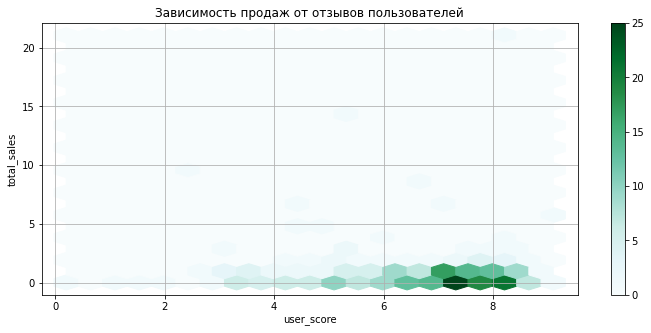

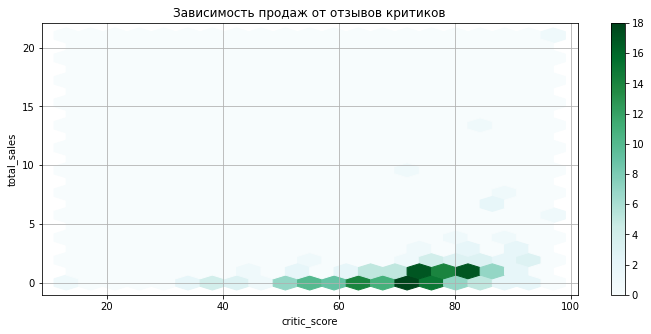

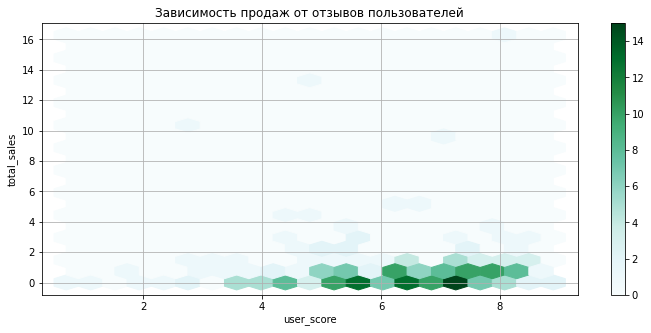

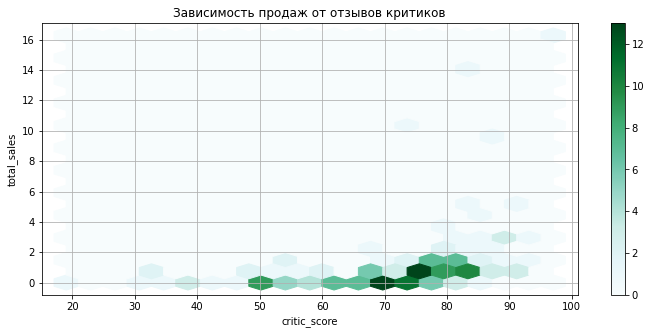

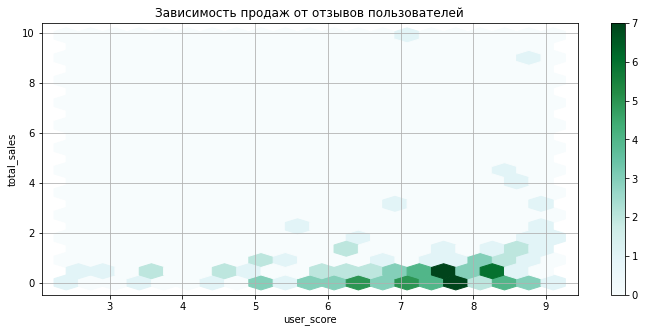

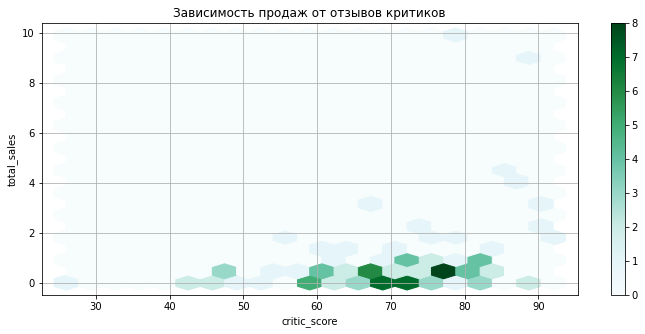

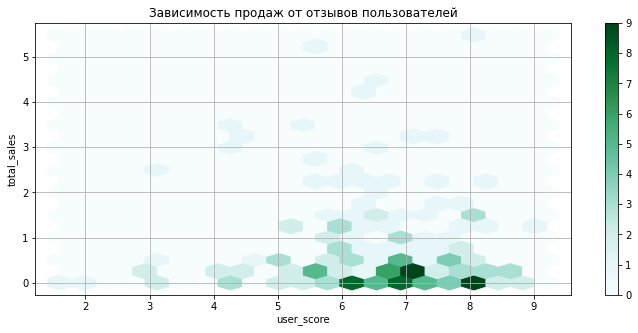

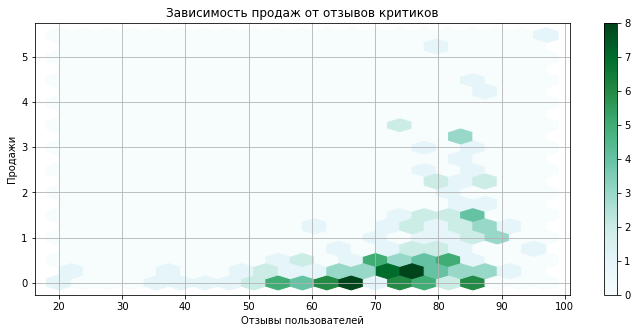

In [33]:
print(f"Коэффициенты корреляции")
for v in list_of_top5:
    df_current_platform = df_live[df_live['platform']== v]
    current_platform_cor = df_current_platform['user_score'].corr(df_current_platform['total_sales'])
    print(f'   Mежду отзывами пользователей и продажами "{v.upper()}" равен {current_platform_cor}')
    
    df_current1_platform = df_live[df_live['platform']== v]
    current1_platform_cor = df_current1_platform['critic_score'].corr(df_current1_platform['total_sales'])
    print(f'   Между отзывами критиков и продажами "{v.upper()}" равен {current1_platform_cor}')
    df_current_platform.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, grid=True, 
                 title='Зависимость продаж от отзывов пользователей', figsize=(12,5))
    df_current1_platform.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, grid=True, 
                 title='Зависимость продаж от отзывов критиков', figsize=(12,5))
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')

print('\n')
    
plt.show()



Посчитаем медиану, среднее, дисперсию, стандартное отклонение у топ5 платформ к оценкам пользователей.

In [34]:
for platform in list_of_top5:
    print('Медиана',platform.upper(),':',  df_live[df_live['platform']==platform]['user_score'].median())
    print('Среднее',platform.upper(),':',  df_live[df_live['platform']==platform]['user_score'].mean())
    print('Дисперсия', platform.upper(),':', np.var(df_live[df_live['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df_live[df_live['platform']==platform]['user_score']))
    print('\n')

Медиана PS4 : 7.0
Среднее PS4 : 6.748249027237353
Дисперсия PS4 : 2.1217965449893263
Стандартное отклонение PS4 : 1.456638783291632


Медиана PS3 : 7.0
Среднее PS3 : 6.532862190812724
Дисперсия PS3 : 2.707789334365517
Стандартное отклонение PS3 : 1.6455361844594962


Медиана X360 : 6.5
Среднее X360 : 6.2208510638297865
Дисперсия X360 : 2.482075871435041
Стандартное отклонение X360 : 1.5754605267778183


Медиана 3DS : 7.4
Среднее 3DS : 7.033333333333332
Дисперсия 3DS : 2.177836257309941
Стандартное отклонение 3DS : 1.4757493883820318


Медиана XONE : 6.8
Среднее XONE : 6.52142857142857
Дисперсия XONE : 1.8965188383045533
Стандартное отклонение XONE : 1.3771415462124992




Посчитаем медиану, среднее, дисперсию, стандартное отклонение у топ5 платформ к оценкам критиков.

In [35]:
for platform in list_of_top5:
    print('Медиана',platform.upper(),':',  df_live[df_live['platform']==platform]['critic_score'].median())
    print('Среднее',platform.upper(),':',  df_live[df_live['platform']==platform]['critic_score'].mean())
    print('Дисперсия', platform.upper(),':', np.var(df_live[df_live['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df_live[df_live['platform']==platform]['critic_score']))
    print('\n')

Медиана PS4 : 73.0
Среднее PS4 : 72.09126984126983
Дисперсия PS4 : 155.28135235575724
Стандартное отклонение PS4 : 12.461193857562655


Медиана PS3 : 74.0
Среднее PS3 : 71.56542056074767
Дисперсия PS3 : 177.46067342125946
Стандартное отклонение PS3 : 13.321436612515162


Медиана X360 : 74.0
Среднее X360 : 70.87134502923976
Дисперсия X360 : 200.28754146575014
Стандартное отклонение X360 : 14.152298098392011


Медиана 3DS : 71.0
Среднее 3DS : 69.8173076923077
Дисперсия 3DS : 143.4377773668639
Стандартное отклонение 3DS : 11.976551146589067


Медиана XONE : 76.0
Среднее XONE : 73.32544378698225
Дисперсия XONE : 166.79941178530163
Стандартное отклонение XONE : 12.915084660400087




### Выводы

У платформ PS4 и XONE:
- между оценками пользователей и продажами корреляция отрицательная. Коэффициент корреляции маленький, что говорит о том, что связь слабая;
- между оценками критиков и продажами платформ корреляция положительная . Коэффициент корреляции равен 40%, что говорит о наличии связи, но не слишком сильной.
У платформы PS3:
- между оценками пользователей и продажами корреляция отрицательная. Коэффициент корреляции близок к 0, что говорит о том, что связь слабая;
- между оценками критиков и продажами платформ корреляция положительная . Коэффициент корреляции равен 33%, что говорит о наличии связи, но небольшой.
У платформы X360:
- между оценками пользователей и продажами корреляция положительная. Коэффициент корреляции близок к 0, что говорит о том, что связь слабая;
- между оценками критиков и продажами платформ корреляция положительная . Коэффициент корреляции равен 36%, что говорит о наличии связи, но небольшой.
У платформы 3DS:
- между оценками пользователей и продажами корреляция положительная. Коэффициент корреляции равен 19%, что говорит о том, что связь слабая;
- между оценками критиков и продажами платформ корреляция положительная . Коэффициент корреляции равен 32%, что говорит о наличии связи, но не слишком сильной.

Значительной корреляции между продажами и оценками пользователей и критиков у всех платформ нет.
Посмотрев на среднее пользовательские оценики платформ и стандартное отклонение, можно сказать что оценки пользователей не сильно влияют на продажи платформ. А оценки критиков сильно влияют на продажи платформ. Покупатели прислушиваются к оценке критиков.



### Посмотрим на общее распределение игр по жанрам.

Выделим жанры с высокими и низкими продажами методом сводной таблицы и отсортируем данные по убыванию.

In [36]:
genre_sales = (
    df_live.pivot_table(index='genre', values='total_sales', aggfunc='sum').
    sort_values(by='total_sales', ascending=False)
)
genre_sales = genre_sales.reset_index().rename_axis(None, axis=1)
genre_sales

,genre,total_sales
0,action,441.12
1,shooter,304.73
2,role-playing,192.80
3,sports,181.07
4,misc,85.04
5,platform,61.00
6,racing,53.50
7,fighting,44.49
8,simulation,35.12
9,adventure,29.43


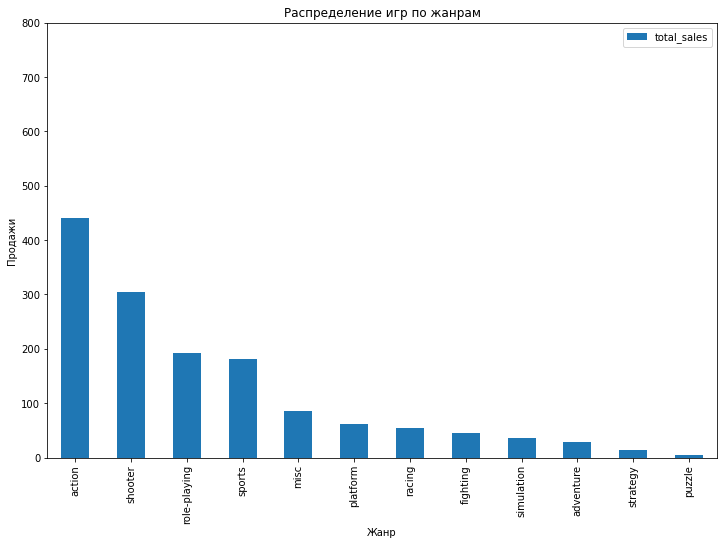

In [37]:
genre_sales.plot(x='genre', y='total_sales', kind='bar', title='Распределение игр по жанрам', figsize=(12,8), ylim=(0,800))
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

### Вывод

Самый прибыльный жанр action. Далее по продажам идут shooter и sports. Наиболее низкие продажи у strategy и puzzle.

### Вывод по исследовательскому анализу

- Видим, что количество выпускаемых игр растет начиная с 1998 года до 2008 года.
- После 2009 года резкий спад игр. Вероятно спад выпускаемых игр связан с мобильными приложениями игр.
- Самые популярные платформы за весь период это ps2, x360, ps3, wii.
- Почти все игровые платформы в среднем живут 5 лет.
- За период с 2010 самые активные платформы были РS3, X360, 3DS.
- Платформа 3DS появилась в 2011 году и ее продажи к концу 2016 года постепенно падают.
- Продажи платформа РS3 к концу 2016 года падают, так как в 2013 году появилась новая версия платформы PS4.  Пик продаж платформы PS4 приходится на 2015 год.
- Продажи игровой платформы X360 к концу 2016 года падают, так как в 2013 году появилась новая верия платформы XONE. Пик продаж платформы XONE приходится на 2015.
- Потенциально прибыльные платформы XONE и PS3.
- Самый прибыльный жанр action. Далее по продажам идут shooter и sports. Наиболее низкие продажи у strategy и puzzle.
- Значительной корреляции между продажами и оценками пользователей и критиков у всех платформ нет.
- Посмотрев на среднее пользовательские оценики платформ и стандартное отклонение, можно сказать что оценки пользователей не сильно влияют на продажи платформ. А оценки критиков сильно влияют на продажи платформ. Покупатели прислушиваются к оценке критиков.





## Составим портрет пользователя каждого региона

Определим для каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Портрет пользователя Северная Америка. 

Найдем топ-5 самых популярных платформ и жанров за актуальный период. 
Посмотрим на различия в долях продаж.

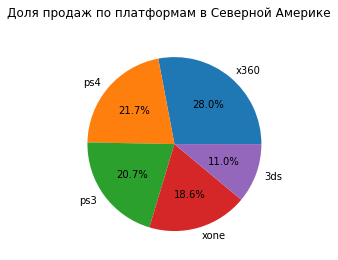

,platform,na_sales
0,x360,140.05
1,ps4,108.74
2,ps3,103.38
3,xone,93.12
4,3ds,55.31


In [38]:
top5_platform_NA = (df_live.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                  .sort_values(by='na_sales', ascending=False).head(5))
top5_platform_NA = top5_platform_NA.reset_index().rename_axis(None, axis=1)
top5_platform_NA['na_sales'] = top5_platform_NA['na_sales'].astype(float)
plt.pie(top5_platform_NA['na_sales'], labels=top5_platform_NA['platform'], autopct='%1.1f%%')
plt.suptitle('Доля продаж по платформам в Северной Америке')
plt.show()
top5_platform_NA

In [39]:
top5_genres_NA = (df_live.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                  .sort_values(by='na_sales', ascending=False).head(5))
top5_genres_NA = top5_genres_NA.reset_index().rename_axis(None, axis=1)
top5_genres_NA

,genre,na_sales
0,action,177.84
1,shooter,144.77
2,sports,81.53
3,role-playing,64.00
4,misc,38.19


Влияет ли рейтинг ESRB на продажи в Северной Америке? Посмотрим на диаграмме распределения, для это воспользуемся функцией boxplot(). 

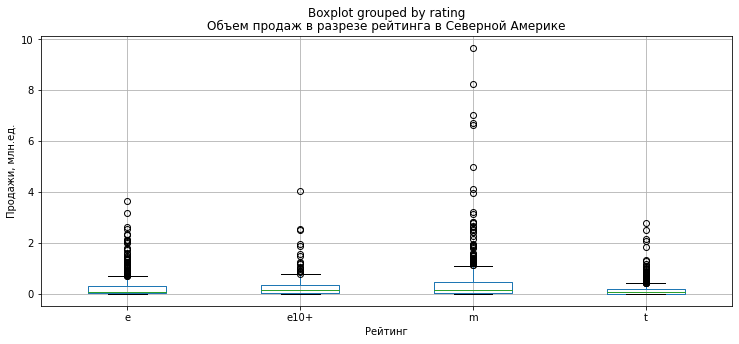

In [40]:
df_live.boxplot(column='na_sales', by='rating', figsize=(12,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн.ед.')
plt.title('Объем продаж в разрезе рейтинга в Северной Америке')
plt.show()

### Вывод 
Портрет пользователя Северной Америке:

- Самые популярные игровые платформы: x360, ps4, ps3, xone, 3ds.
- Популярные жанры: action, shooter, sports, role-playing, misc .
- Больше всего продаж у игр с рейтингом (от 17+ и старше) и меньше всего продаж у игр с рейтингом(от 13+)

### Портрет пользователя Европейского Союза

Найдем топ-5 самых популярных платформ и жанров за актуальный период. 
Посмотрим на различия в долях продаж.

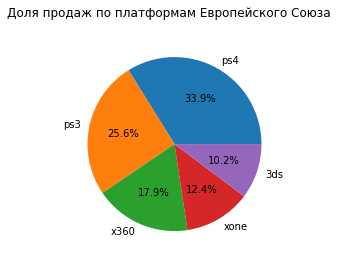

,platform,eu_sales
0,ps4,141.09
1,ps3,106.86
2,x360,74.52
3,xone,51.59
4,3ds,42.64


In [41]:
top5_platform_EU = (df_live.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                  .sort_values(by='eu_sales', ascending=False).head(5))
top5_platform_EU = top5_platform_EU.reset_index().rename_axis(None, axis=1)
top5_platform_EU['eu_sales'] = top5_platform_EU['eu_sales'].astype(float)
plt.pie(top5_platform_EU['eu_sales'], labels=top5_platform_EU['platform'], autopct='%1.1f%%')
plt.suptitle('Доля продаж по платформам Европейского Союза')
plt.show()
top5_platform_EU

In [42]:
top5_genres_EU = (df_live.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                  .sort_values(by='eu_sales', ascending=False).head(5))
top5_genres_EU = top5_genres_EU.reset_index().rename_axis(None, axis=1)
top5_genres_EU

,genre,eu_sales
0,action,159.34
1,shooter,113.47
2,sports,69.09
3,role-playing,48.53
4,racing,27.29


Влияет ли рейтинг ESRB на продажи в Европейском Союзе? Посмотрим на диаграмме распределения, для это воспользуемся функцией boxplot().

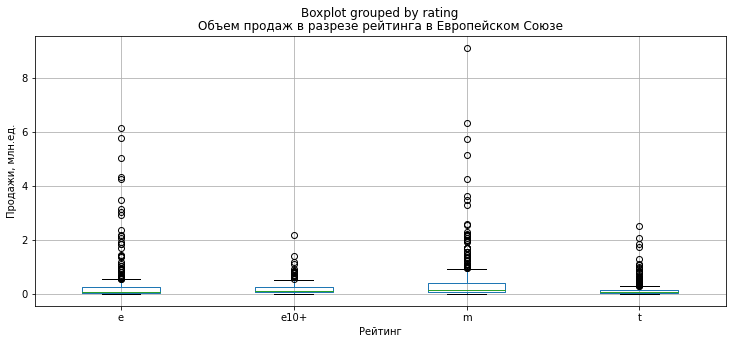

In [43]:
df_live.boxplot(column='eu_sales', by='rating', figsize=(12,5))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн.ед.')
plt.title('Объем продаж в разрезе рейтинга в Европейском Союзе')
plt.show()

### Вывод
Портрет пользователя Европейского Союза:

- Самые популярные игровые платформы: ps4, ps3, x360, xone, 3ds .
- Популярные жанры: action, shooter, sports,role-playing, racing.
- Больше всего продаж у игр с рейтингом (от 17+ и старше) и меньше всего продаж у игр с рейтингом(от 13+)

### Портрет пользователя Японии

Найдем топ-5 самых популярных платформ и жанров за актуальный период. 
Посмотрим на различия в долях продаж.

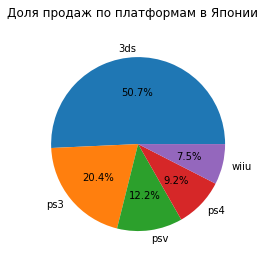

,platform,jp_sales
0,3ds,87.79
1,ps3,35.29
2,psv,21.04
3,ps4,15.96
4,wiiu,13.01


In [44]:
top5_platform_JP = (df_live.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                  .sort_values(by='jp_sales', ascending=False).head(5))
top5_platform_JP = top5_platform_JP.reset_index().rename_axis(None, axis=1)
top5_platform_JP['jp_sales'] = top5_platform_JP['jp_sales'].astype(float)
plt.pie(top5_platform_JP['jp_sales'], labels=top5_platform_JP['platform'], autopct='%1.1f%%')
plt.suptitle('Доля продаж по платформам в Японии')
plt.show()
top5_platform_JP

In [45]:
top5_genres_JP = (df_live.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                  .sort_values(by='jp_sales', ascending=False).head(5))
top5_genres_JP = top5_genres_JP.reset_index().rename_axis(None, axis=1)
top5_genres_JP

,genre,jp_sales
0,role-playing,65.44
1,action,52.80
2,misc,12.86
3,simulation,10.41
4,fighting,9.44


Влияет ли рейтинг ESRB на продажи в Японии? Посмотрим на диаграмме распределения, для это воспользуемся функцией boxplot().

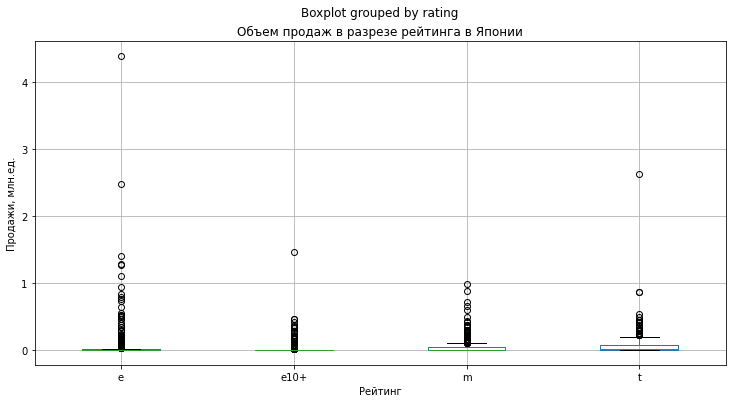

In [46]:
df_live.boxplot(column='jp_sales', by='rating', figsize=(12,6))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн.ед.')
plt.title('Объем продаж в разрезе рейтинга в Японии')
plt.show()

### Вывод
Портрет пользователя Японии:

- Самые популярные игровые платформы: 3ds, ps3, psv, ps4, wiiu.
- Популярные жанры: role-playing, action, misc, simulation, fighting .
- Продажи игр с рейтингом (от 17+ и старше) и с рейтингом (от 13+). 

### Вывод по составлению портрета пользователя каждого региона:

Портрет пользователя Северной Америке:

- Самые популярные игровые платформы: x360, ps4, ps3, xone, 3ds.
- Популярные жанры: action, shooter, sports, role-playing, misc .
- Больше всего продаж у игр с рейтингом (от 17+ и старше) и меньше всего продаж у игр с рейтингом(от 13+)

Портрет пользователя Европейского Союза:

- Самые популярные игровые платформы: ps4, ps3, x360, xone, 3ds .
- Популярные жанры: action, shooter, sports,role-playing, racing.
- Больше всего продаж у игр с рейтингом (от 17+ и старше) и меньше всего продаж у игр с рейтингом(от 13+)

Портрет пользователя Японии:

- Самые популярные игровые платформы: 3ds, ps3, psv, ps4, wiiu.
- Популярные жанры: role-playing, action, misc, simulation, fighting .
- Продажи игр с рейтингом (от 17+ и старше) и с рейтингом (от 13+). 

В 2017 году прибыль будут приносить игры жанра action, shooter и sports, для платформ ps3, с рейтингом от 17+ и старше. 

## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем гипотезы:
-Нулевая гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC равны;
-Альтернативная гипотеза Н0:Средние пользовательские рейтинги платформ Xbox One и PC не равны.
Для проверки гипотез удалим пропуски из столбца user_score.
Сравним средние значения t-тестом применив метод scipy.stats.ttest_ind(). Критический уровень статистической значимости задаем значением 0.01

In [47]:
df_user_score = df_live[df_live['user_score'].isna()==False]

In [48]:
xone_score = df_user_score[df_user_score['platform'] == 'xone']['user_score']
pc_score = df_user_score[df_user_score['platform'] == 'pc']['user_score']


alpha = .01

results = st.ttest_ind(
    xone_score,
    pc_score,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [49]:
xone_score = df_user_score[df_user_score['platform'] == 'xone']['user_score'].mean()
pc_score = df_user_score[df_user_score['platform'] == 'pc']['user_score'].mean()
print(f'Средняя пользовательская оценка платформы Xbox One равна {xone_score}')
print(f'Средняя пользовательская оценка платформы PC равна {pc_score}')

Средняя пользовательская оценка платформы Xbox One равна 6.52142857142857
Средняя пользовательская оценка платформы PC равна 6.428640776699027


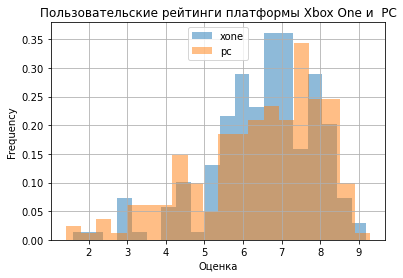

In [50]:
ax = df_user_score[df_user_score['platform'] == 'xone']['user_score'].plot(kind='hist', bins=20, grid=True, density=True, alpha=0.5, label='xone')
ax = df_user_score[df_user_score['platform'] == 'pc']['user_score'].plot(kind='hist', bins=20, grid=True, density=True, alpha=0.5, label='pc')
ax.set_title('Пользовательские рейтинги платформы Xbox One и  PC')
ax.set_xlabel('Оценка')
plt.legend(loc='upper center')
plt.show()

### Вывод
Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны верна. Видим на гистограмме распределения, что пользовательские рейтинги  платформ Xbox One и P мало отличаются. Средние пользовательские рейтинги платформ Xbox One и PC равны 6.5.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем гипотезы:

-Нулевая гипотеза Н1: Средние пользовательские рейтинги жанров Action и Sports равны;
-Альтернативная гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports не равны.
Сравним средние значения t-тестом применив метод scipy.stats.ttest_ind(). Критический уровень статистической значимости задаем значением 0.01

In [51]:
action_score = df_user_score[df_user_score['genre'] == 'action']['user_score']
sports_score = df_user_score[df_user_score['genre'] == 'sports']['user_score']


alpha = .01

results = st.ttest_ind(
    action_score,
    sports_score,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


In [52]:
action_score = df_user_score[df_user_score['genre'] == 'action']['user_score'].mean()
sports_score = df_user_score[df_user_score['genre'] == 'sports']['user_score'].mean()
print(f'Средняя пользовательская оценка жанра Action равна {action_score}')
print(f'Средняя пользовательская оценка жанра Sports равна {sports_score}')

Средняя пользовательская оценка жанра Action равна 6.825047801147237
Средняя пользовательская оценка жанра Sports равна 5.455897435897437


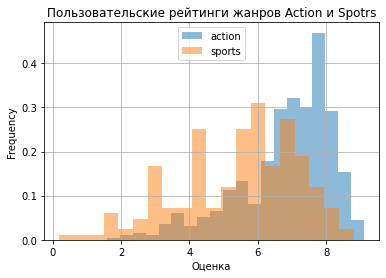

In [53]:
ax = df_user_score[df_user_score['genre'] == 'action']['user_score'].plot(kind='hist', bins=20, grid=True, density=True, alpha=0.5, label='action')
ax = df_user_score[df_user_score['genre'] == 'sports']['user_score'].plot(kind='hist', bins=20, grid=True, density=True, alpha=0.5, label='sports')
ax.set_title('Пользовательские рейтинги жанров Action и Spotrs')
ax.set_xlabel('Оценка')
plt.legend(loc='upper center')
plt.show()

### Вывод
Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны отвергается. Видим на гистограмме распределения, что пользовательские рейтинги  жанров Action и Sports  отличаются. Средная пользовательская оценка жанра Action равны 6.78. А средная пользовательская оценка жанра Sports равна 5.9.

## Общий вывод

Мы провели анализ исходных данных и выявили следующие:

- Привели названия столбцов и колонок к нижнему регистру.
- В столбце user_score привели значение столбца в числовой формат.
- В столбцах name, genre  избавились от пропусков.
- Выяснили, что аббревиатуру "tbd" значает "to be determined", "to be done". Данные были не заполнены специально, так как не определились с рейтингом.  Заменили tbd на NaN для проведения дальнейшего анализа.

Проанализировали данные:

- Видим, что количество выпускаемых игр растет начиная с 1998 года до 2008 года.
- После 2009 года видим резкий спад игр. Вероятно спад выпускаемых игр связан с мобильными приложениями игр.
- Самые популярные платформы за весь период это ps2, x360, ps3, wii.
- Почти все игровые платформы в среднем живут 7 лет.
- За период с 2010 самые активные платформы были РS3, X360, 3DS.
- Платформа 3DS появилась в 2011 году и ее продажи к концу 2016 года постепенно падают.
- Продажи платформа РS3 к концу 2016 года падают, так как в 2013 году появилась новая версия платформы PS4.  Пик продаж платформы PS4 приходится на 2015 год.
- Продажи игровой платформы X360 к концу 2016 года падают, так как в 2013 году появилась новая верия платформы XONE. Пик продаж платформы XONE приходится на 2015.
- Потенциально прибыльные платформы XONE и PS3.
- Самый прибыльный жанр action. Далее по продажам идут shooter и sports. Наиболее низкие продажи у strategy и puzzle.
- Посмотрев на среднее пользовательские оценики платформ и стандартное отклонение, можно сказать что оценки пользователей не сильно влияют на продажи платформ. А оценки критиков сильно влияют на продажи платформ. Покупатели прислушиваются к оценке критиков.

Составили портрет пользователя каждого региона:

Портрет пользователя Северной Америке:

- Самые популярные игровые платформы: x360, ps4, ps3, xone, 3ds.
- Популярные жанры: action, shooter, sports, role-playing, misc .
- Больше всего продаж у игр с рейтингом (от 17+ и старше) и меньше всего продаж у игр с рейтингом(от 13+)

Портрет пользователя Европейского Союза:

- Самые популярные игровые платформы: ps4, ps3, x360, xone, 3ds .
- Популярные жанры: action, shooter, sports,role-playing, racing.
- Больше всего продаж у игр с рейтингом (от 17+ и старше) и меньше всего продаж у игр с рейтингом(от 13+)

Портрет пользователя Японии:

- Самые популярные игровые платформы: 3ds, ps3, psv, ps4, wiiu.
- Популярные жанры: role-playing, action, misc, simulation, fighting .
- Продажи игр с рейтингом (от 17+ и старше) и с рейтингом (от 13+). 

В 2017 году прибыль будут приносить игры жанра action, shooter и sports, для платформ ps3, с рейтингом от 17+ и старше. 
Проверили гипотезы:

Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны верна. Видим на гистограмме распределения, что пользовательские рейтинги  платформ Xbox One и P мало отличаются. Средние пользовательские рейтинги платформ Xbox One и PC равны 6.5.

Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны отвергается. Видим на гистограмме распределения, что пользовательские рейтинги  жанров Action и Sports  отличаются. Средная пользовательская оценка жанра Action равны 6.78. А средная пользовательская оценка жанра Sports равна 5.9.
